<a href="https://colab.research.google.com/github/tecexbarto/Mobile_phone/blob/main/Mobile_phone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ANÁLISIS DE DATOS SOBRE UN DATASET DE TELÉFONOS MÓVILES***

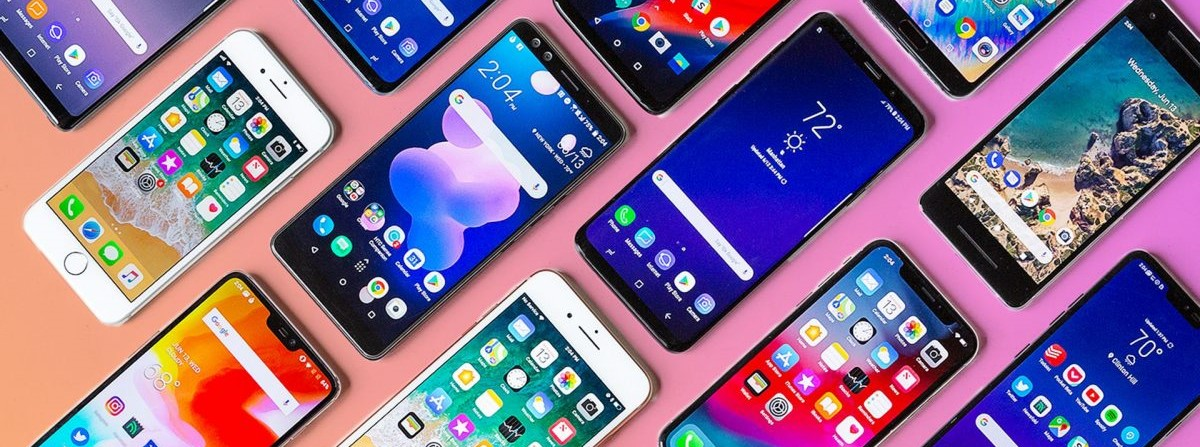

#IMPORTACIÓN DE DATOS

En este trabajo vamos a utilizar, como librería de manipulación de datos, Polars en lugar de Pandas. Polars es una librería en agua y pensamos que sería interesante conocerla mejor.



In [1]:
import polars as pl
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

En esta ocasión también vamos a hacer uso de un dataset de Kaggle: Mobile Phone Price. Este dataset contiene información sobre teléfonos móviles de diferentes marcas.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mobile phone price.csv to Mobile phone price.csv


In [3]:
df = pl.read_csv('Mobile phone price.csv')

#ANÁLISIS DE DATOS

##ANÁLISIS EXPLORATORIO DE DATOS

Vamos a iniciar el análisis de datos con un analisis exploratorio, que nos servirá para comprender su naturaleza, características y posibles patrones.


In [4]:
#empezamos el análisis echando un vistazo al dataframe. Polars, al visualizar el df, incluye el shape del mismo y los tipos de datos en las diferentes columnas
df

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""Apple""","""iPhone 13 Pro""","""128 GB""","""6 GB""","""6.1""","""12 + 12 + 12""",3095,"""999"""
"""Samsung""","""Galaxy S21 Ult…","""256 GB""","""12 GB""","""6.8""","""108 + 10 + 10 …",5000,"""1199"""
"""OnePlus""","""9 Pro""","""128 GB""","""8 GB""","""6.7""","""48 + 50 + 8 + …",4500,"""899"""
"""Xiaomi""","""Redmi Note 10 …","""128 GB""","""6 GB""","""6.67""","""64 + 8 + 5 + 2…",5020,"""279"""
"""Google""","""Pixel 6""","""128 GB""","""8 GB""","""6.4""","""50 + 12.2""",4614,"""799"""
"""Apple""","""iPhone 13""","""128 GB""","""4 GB""","""6.1""","""12 + 12""",2815,"""799"""
"""Samsung""","""Galaxy Z Flip3…","""256 GB""","""8 GB""","""6.7""","""12 + 12""",3300,"""999"""
"""Xiaomi""","""Poco X3 Pro""","""128 GB""","""6 GB""","""6.67""","""48 + 8 + 2 + 2…",5160,"""249"""
"""Oppo""","""Reno6 Pro+ 5G""","""128 GB""","""8 GB""","""6.55""","""50 + 13 + 16 +…",4500,"""699"""


En primer lugar vamos a explicar qué significa cada campo del dataframe

| Variable  | Definicion |
|-----------|-----------|
| Brand | Marca del teléfono móvil
| Model | Modelo del teléfono móvil
| Storage | Capacidad de almacenamiento en gigabytes (GB)
| RAM | Memoria RAM del dispositivo, también en gigabytes
| Screen Size (inches) | Tamaño de la pantalla del teléfono, en pulgadas
| Camera (MP) | Nivel de resolución (megapíxeles) de las fotografías que pueden hacer las diferentes cámaras del móvil
| Battery Capacity (mAh) | Capacidad de la batería con la que cuenta el dispositivo, se mide en miliamperios (mAh)
| Price ($) | Precio del teléfono móvil en dólares

In [5]:
#hagamos un head para observar los primeros registros
df.head()

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""Apple""","""iPhone 13 Pro""","""128 GB""","""6 GB""","""6.1""","""12 + 12 + 12""",3095,"""999"""
"""Samsung""","""Galaxy S21 Ult…","""256 GB""","""12 GB""","""6.8""","""108 + 10 + 10 …",5000,"""1199"""
"""OnePlus""","""9 Pro""","""128 GB""","""8 GB""","""6.7""","""48 + 50 + 8 + …",4500,"""899"""
"""Xiaomi""","""Redmi Note 10 …","""128 GB""","""6 GB""","""6.67""","""64 + 8 + 5 + 2…",5020,"""279"""
"""Google""","""Pixel 6""","""128 GB""","""8 GB""","""6.4""","""50 + 12.2""",4614,"""799"""


In [6]:
#tomamos a su vez una muestra aleatoria de los registros
df.sample(5)

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""Huawei""","""P40 Pro""","""256""","""8""","""6.58""","""50+12+40+3D""",4200,"""1099"""
"""Realme""","""C21Y""","""64GB""","""4GB""","""6.5""","""13MP + 2MP + 2…",5000,"""$149 """
"""Samsung""","""Galaxy A22 4G""","""128 GB""","""6 GB""","""6.4""","""48 + 5 + 2""",5000,"""229"""
"""Apple""","""iPhone 11""","""64 GB""","""4 GB""","""6.1""","""12 + 12""",3110,"""599"""
"""Samsung""","""Galaxy A21s""","""128""","""6""","""6.5""","""48+8+2+2""",5000,"""199"""


In [7]:
#y hagamos también un tail para los últimos
df.tail()

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""Samsung""","""Galaxy Note20 …","""128""","""8""","""6.7""","""12+64+12""",4300,"""1049"""
"""Xiaomi""","""Mi 10 Lite 5G""","""128""","""6""","""6.57""","""48+8+2+2""",4160,"""349"""
"""Apple""","""iPhone 12 Pro …","""128""","""6""","""6.7""","""12+12+12""",3687,"""1099"""
"""Oppo""","""Reno3""","""128""","""8""","""6.4""","""48+13+8+2""",4025,"""429"""
"""Samsung""","""Galaxy S10 Lit…","""128""","""6""","""6.7""","""48+12+5""",4500,"""649"""


In [8]:
n_filas = df.shape[0]
n_columnas = df.shape[1]
print('El dataframe tiene', n_filas, 'filas y', n_columnas, 'columnas')

El dataframe tiene 407 filas y 8 columnas


In [9]:
#con el atributo schema tenemos los nombres de las diversas columnas y el tipo de datos que contienen
#vemos que la mayoría de las columnas, exceptuando 'Battery Capacity (mAh)' que contiene números enteros, contiene el tipo de dato Utf8, que en Polars es un alias de un String
df.schema

OrderedDict([('Brand', Utf8),
             ('Model', Utf8),
             ('Storage ', Utf8),
             ('RAM ', Utf8),
             ('Screen Size (inches)', Utf8),
             ('Camera (MP)', Utf8),
             ('Battery Capacity (mAh)', Int64),
             ('Price ($)', Utf8)])

In [10]:
#veremos también la cantidad de valores únicos que hay en cada columna
df.select(pl.all().approx_n_unique())

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
u32,u32,u32,u32,u32,u32,u32,u32
16,234,13,20,41,144,48,89


In [11]:
#comprobamos a su vez si nuestro dataset contiene algún nulo
df.null_count()

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


Ahora vamos a repasar columna por columna. Empezamos con la columna 'Brand'

In [12]:
#vemos cuántos móviles tenemos de cada marca
df_brand = df['Brand'].value_counts(sort=True)
df_brand

Brand,count
str,u32
"""Samsung""",79
"""Xiaomi""",67
"""Oppo""",56
"""Realme""",43
"""Vivo""",35
"""Apple""",30
"""Nokia""",28
"""Motorola""",23
"""OnePlus""",15


En la versión de Polars que estoy usando, la 0.20 (la versión estable en el momento en el que estoy realizando el trabajo) no está todavía implementado el argumento 'normalize' en el método 'value_counts', que permite extraer el porcentaje de cada valor único.

Así pues, buscamos otra manera para conseguir esa información.

In [13]:
df_brand_p = (df_brand.with_columns(((pl.col('count') / df.shape[0] * 100).round(2)).alias('Percent')))
df_brand_p

Brand,count,Percent
str,u32,f64
"""Samsung""",79,19.41
"""Xiaomi""",67,16.46
"""Oppo""",56,13.76
"""Realme""",43,10.57
"""Vivo""",35,8.6
"""Apple""",30,7.37
"""Nokia""",28,6.88
"""Motorola""",23,5.65
"""OnePlus""",15,3.69


Parece ser que Polars no es tan compatible como Pandas con respecto a las librerías de visualización. Afortunadamente, intento hacer este gráfico en plotly express y me lo permite.

In [14]:
fig = px.bar(df_brand_p, x="Brand", y="count", title = "Phones by brand", width=1000, color='Brand')
fig.update_layout(title_x=0.5)
fig.show()

Creemos que puede resultar útil crear dos nuevas columnas a partir de la colummna 'Brand'. La primera es el sistema operativo. A día de hoy, existen dos grandes sistemas operativos en móviles, el primero es Android (perteneciente a Google), y el otro es IOS (desarrollado por Apple).

Vamos a revisar todas las marcas de nuestro dataset para comprobar que estamos en lo cierto y que tienen Android como SO. A continuar voy a mencionar aquellas que nos generaron alguna duda.

In [15]:
#Sabemos que anteriormente Blackberry tenía su propio sistema operativo, pero desde el 2015 sus móviles llevan Android.
#filtramos sus móviles para averiguar cuáles son y comprobar si tienen Android uno por uno, y comprobamos que así es. Afortunadamente, los móviles de nuestro dataset son relativamente modernos
df.filter(pl.col("Brand") == "Blackberry")

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""Blackberry""","""KEY2 LE""","""64GB""","""4GB""","""4.5""","""13MP + 5MP""",3000,"""$399 """
"""Blackberry""","""KEY2""","""64GB""","""6GB""","""4.5""","""12MP + 12MP""",3500,"""$699 """
"""Blackberry""","""Evolve""","""64GB""","""6GB""","""5.99""","""12MP + 13MP""",4000,"""$399 """


In [16]:
#con Nokia sucede un caso similar. En el paso tuvieron varios SO (Symbian, Windows Phone, entre otros), pero empezaron a tener Android en el 2017.
#filtramos sus móviles, que son 28, y comprobamos también uno por uno que tienen el sistema operativo de Google
df.filter(pl.col("Brand") == "Nokia")

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""Nokia""","""XR20""","""128GB""","""6GB""","""6.67""","""48MP + 13MP""",4630,"""$549 """
"""Nokia""","""5.4""","""64GB""","""4GB""","""6.39""","""48MP + 5MP + 2…",4000,"""$249 """
"""Nokia""","""C20 Plus""","""32GB""","""3GB""","""6.5""","""8MP + 2MP""",4950,"""$99 """
"""Nokia""","""G20""","""64GB""","""4GB""","""6.5""","""48MP + 5MP""",5050,"""$199 """
"""Nokia""","""C30""","""64GB""","""3GB""","""6.82""","""13MP + 2MP""",6000,"""$149 """
"""Nokia""","""XR20""","""128GB""","""6GB""","""6.67""","""48MP + 13MP""",4630,"""$549 """
"""Nokia""","""C20 Plus""","""32GB""","""3GB""","""6.5""","""8MP + 2MP""",4950,"""$109 """
"""Nokia""","""G50""","""64GB""","""4GB""","""6.82""","""48MP + 5MP + 2…",5000,"""$299 """
"""Nokia""","""C30""","""32GB""","""2GB""","""6.82""","""13MP + 2MP""",6000,"""$149 """


In [17]:
#con Sony también albergábamos alguna duda, pero nos informamos y parece ser que desde el 2010 sus móviles llevan Android
#en  nuestros registros solo tenemos un móvil de Sony y comprobamos que también lleva Android
df.filter(pl.col("Brand") == "Sony")

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""Sony""","""Xperia 5 III""","""128GB""","""8GB""","""6.1""","""12MP + 12MP + …",4500,"""$1,299 """


In [18]:
#no conocíamos la marca CAT y ello nos suscitó alguna duda, pero parece ser que se trata de una marca de móviles resistentes, y que también llevan el sistema operativo de Google
df.filter(pl.col("Brand") == "CAT")

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""CAT""","""S42""","""32GB""","""3GB""","""5.5""","""13MP + 5MP""",4200,"""$299 """


En el caso de Huawei, antes de la prohibición comercial de Estados Unidos en 2019, Huawei lanzaba todos sus teléfonos con Android. Después de la prohibición, Huawei desarrolló su propio sistema operativo, HarmonyOS, para reemplazar Android en muchos de sus dispositivos. Vamos a revisar la lista de móviles de Huawei para posteriormente comprobar su sistema operativo.

In [19]:
#repasamos los distintos modelos y vemos que tenemos Android en algunos casos y Harmony en otros
df.filter(pl.col("Brand") == "Huawei")

Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
str,str,str,str,str,str,i64,str
"""Huawei""","""Mate 40 Pro""","""256""","""8""","""6.76""","""50+20+12+3D""",4400,"""1199"""
"""Huawei""","""Nova 8 Pro 5G""","""128""","""8""","""6.72""","""64+8+2+2""",4000,"""699"""
"""Huawei""","""P40 Pro""","""256""","""8""","""6.58""","""50+12+40+3D""",4200,"""1099"""
"""Huawei""","""Nova 9 Pro 5G""","""256""","""8""","""6.72""","""50+8+16+2""",4500,"""699"""
"""Huawei""","""Mate 30 Pro 5G…","""256""","""8""","""6.53""","""40+40+8+3D""",4500,"""1099"""
"""Huawei""","""P30 Pro""","""256""","""8""","""6.47""","""40+20+8+ToF""",4200,"""999"""
"""Huawei""","""Nova 7i""","""128""","""8""","""6.4""","""48+8+2+2""",4200,"""329"""
"""Huawei""","""P40 Pro+""","""512""","""8""","""6.58""","""50+40+12+3D""",4200,"""1399"""
"""Huawei""","""P40 Pro""","""256""","""8""","""6.58""","""50+12+40+3D""",4200,"""999"""


Hechas estas comprobaciones para los casos dudosos, ahora podemos atajar con más seguridad la clasificación de los móviles en sistemas operativos.

In [20]:
os_map = {
    'Samsung': 'Android',
    'Xiaomi': 'Android',
    'Oppo': 'Android',
    'Realme': 'Android',
    'Vivo': 'Android',
    'Apple': 'iOS',
    'Nokia': 'Android',
    'Motorola': 'Android',
    'OnePlus': 'Android',
    'Huawei': 'Android',  #de momento vamos a incluir a Huawei dentro de los móviles Android, y luego ya introduciremos las excepciones oportunas
    'Google': 'Android',
    'Asus': 'Android',
    'LG': 'Android',
    'Blackberry': 'Android',
    'Sony': 'Android',
    'CAT': 'Android',
    }

In [21]:
#En Polars podemos hacer esta operación con el método replace
df = df.with_columns([
    pl.col('Brand').replace(os_map, default=None).alias('OS')
])

In [22]:
#establecemos el sistema operativo de los móviles Huawei según el modelo. Aclarar que algunos de los móviles que llevan Android no incluyen los servicios de Google
huawei_android = ['Mate 40 Pro', 'Nova 8 Pro 5G', 'P40 Pro', 'Mate 30 Pro 5G', 'P30 Pro', 'Nova 7i', 'P40 Pro+', 'P40 Pro', 'Y7p', 'Nova 7i', 'P30 Lite']
huawei_harmony = ['Nova 9 Pro 5G']  #solo encontramos un móvil que no lleva Android

In [23]:
#lo aplicamos a la nueva columna OS
df = df.with_columns([
    pl.when((pl.col("Brand") == "Huawei") & (pl.col("Model").is_in(huawei_android))) #establecemos una condición doble, que la marca sea Huawei y que el modelo esté en la lista de Huawei_android
      .then(pl.lit("Android")) #creamos una constante con valor 'Android' que se asigna si se cumplen las condiciones de arriba
      .otherwise(
          pl.when((pl.col("Brand") == "Huawei") & (pl.col("Model").is_in(huawei_harmony)))
          .then(pl.lit("HarmonyOS"))
          .otherwise(pl.col("OS"))  #mantenemos el valor original de 'OS' si no se cumplen las condiciones anteriores
      )
      .alias("OS")
])

In [24]:
#una vez culminada esta columna, comprobamos cuántos móviles tenemos de cada sistema operativo
df_os = df['OS'].value_counts(sort=True)
df_os

OS,count
str,u32
"""Android""",376
"""iOS""",30
"""HarmonyOS""",1


In [25]:
#por último lo vamos a representar en un gráfico
fig_os = px.pie(df_os, values='count', names='OS', title='Mobile phone OS', hole=0.5)
fig_os.update_layout(title_x=0.5, width=800, height=600)
fig_os.show()

Podemos ver cómo los móviles Android prevalecen de forma abrumadora en nuestro dataset, con más del 90% de los dispositivos. iOS obtiene un 7% de los modelos, y HarmonyOS solo está representado con un dispositivo, lo que le hace obtener un 0.2% del total.

Señalar que esta abrumadora superioridad de Android se debe a que solo Apple desarrolla móviles con iOS, mientras que ya hemos visto que para Android fabrican dispositivos multitud de marcas.

Otra columna nueva que pensamos que podría resultar de interés es la del país del que procede la marca.

In [26]:
#hacemos también un map de los países
country_map = {
    'Samsung': 'South Korea',
    'Xiaomi': 'China',
    'Oppo': 'China',
    'Realme': 'China',
    'Vivo': 'China',
    'Apple': 'United States',
    'Nokia': 'Finland',
    'Motorola': 'China',  #en este caso tengo dudas porque Motorola Mobility es una empresa estadounidense pero filial del conglomerado tecnológico chino Lenovo
    'OnePlus': 'China',
    'Huawei': 'China',
    'Google': 'United States',
    'Asus': 'Taiwan',
    'LG': 'South Korea',
    'Blackberry': 'Canada',
    'Sony': 'Japan',
    'CAT': 'United States',
    }

In [27]:
#creamos una nueva columna con la nacionalidad de los dispositivos
df = df.with_columns([
    pl.col('Brand').replace(country_map, default=None).alias('Country')
])

In [28]:
#vemos ahora cómo se distribuyen las nacionalidades
df_country = df['Country'].value_counts(sort=True)
df_country

Country,count
str,u32
"""China""",251
"""South Korea""",82
"""United States""",38
"""Finland""",28
"""Taiwan""",4
"""Canada""",3
"""Japan""",1


In [29]:
#como es costumbre también lo vamos a representar en un gráfico
fig_country = px.pie(df_country, values='count', names='Country', title='Mobile phone country', hole=0.5)
fig_country.update_layout(title_x=0.5, width=800, height=600)
fig_country.show()

Con estos análisis queda claro que las marcas asiáticas son las principales fabricantes de móviles, al menos en cuanto a cantidad de modelos producidos (otra cuestión sería en cuanto a ventas de dispositivos, pero de ello no tenemos datos en nuestro dataset). De Asia sobresalen notablemente los móviles chinos, con más del 60% del total de dispositivos. Los móviles surcoreanos ocupan el segundo puesto, con aproximadamente un 20%. El tercer puesto es reservado para los Estados Unidos de América.

Vamos ahora con la columna Model.

In [30]:
df['Model'].value_counts(sort=True)

Model,count
str,u32
"""Poco X3 Pro""",6
"""Redmi 10 Prime…",5
"""Y33s""",5
"""iPhone XR""",5
"""C21Y""",5
"""A54""",5
"""Redmi Note 10 …",4
"""Galaxy A52s 5G…",4
"""Redmi Note 10 …",4


Tenemos solo 239 modelos de móviles en el dataset. Dado que este contiene 407 registros, podemos deducir que hay valores repetidos en el campo 'Model'. Esto, aunque en un principio nos resulte un tanto inesperado, ya que esperábamos que hubiera tantos nombres de modelos como registros, tiene cierto sentido: es bastante usual que, de un mismo modelo, se fabriquen variantes con distintas configuraciones en alguna de sus prestaciones, por ejemplo, variando la RAM o la capacidad de almacenamiento, o simplemente el color del terminal.

Debido a esto, y también al hecho de no contar con demasiados registros en el dataset, decidimos no prescindir de los modelos con nombres duplicados.


Vamos con la columna 'Storage'. Hemos observado que en algunos registros aparece GB, que es la abreviatura de gigabytes, y en otros no. Vamos a dejar en la columna solo los números.

In [31]:
#pero lo primero que vamos a hacer es renombrar la columna
df = df.rename({'Storage ': 'Storage (GB)'})

In [32]:
#ahora ya borramos lo que deseamos
df = df.with_columns([
    pl.col('Storage (GB)').str.replace(' GB', '').str.replace('GB', '').alias('Storage (GB)')
])

In [33]:
#vemos cuántas capacidades de almacenamiento tenemos distintas, y el conteo de cada una de aquellas
df_storage = df['Storage (GB)'].value_counts(sort=True)
df_storage

Storage (GB),count
str,u32
"""128""",250
"""64""",83
"""256""",40
"""32""",31
"""512""",3


In [34]:
#ahora lo vemos en porcentajes. 128 GB es la capacidad de almacenamiento más frecuente en los móviles, con más del 60% de los móviles del dataset
df_storage_p = (df_storage.with_columns(((pl.col('count') / df.shape[0] * 100).round(2)).alias('Percent')))
df_storage_p

Storage (GB),count,Percent
str,u32,f64
"""128""",250,61.43
"""64""",83,20.39
"""256""",40,9.83
"""32""",31,7.62
"""512""",3,0.74


In [35]:
#vamos a representarlo en un gráfico
fig_storage = px.pie(df_storage, values='count', names='Storage (GB)', title='Mobile phone storage', hole=0.5)
fig_storage.update_layout(title_x=0.5, width=800, height=600)
fig_storage.show()

In [36]:
#lo último es cambiar el tipo de dato de la columna, que es str y queremos que sea integer
df = df.with_columns(
    pl.col('Storage (GB)').cast(pl.Int64).alias('Storage (GB)')
)

Vamos con la columna RAM.

In [37]:
#lo primero que vamos a hacer es renombrar la columna
df = df.rename({'RAM ': 'RAM (GB)'})

In [38]:
#dejamos solo los números, al igual que hicimos en el apartado anterior
df = df.with_columns([
    pl.col('RAM (GB)').str.replace(' GB', '').str.replace('GB', '').alias('RAM (GB)')
])

In [39]:
#vamos a hacer un conteo de las diferentes RAM
df_ram = df['RAM (GB)'].value_counts(sort=True)
df_ram

RAM (GB),count
str,u32
"""4""",128
"""6""",107
"""8""",95
"""3""",38
"""12""",25
"""2""",11
"""5""",2
"""16""",1


In [40]:
#ahora lo vemos en porcentajes. 4 GB es la memoria RAM más frecuente en nuestro dataset, seguida de cerca por los 6 GB
df_ram_p = (df_ram.with_columns(((pl.col('count') / df.shape[0] * 100).round(2)).alias('Percent')))
df_ram_p

RAM (GB),count,Percent
str,u32,f64
"""4""",128,31.45
"""6""",107,26.29
"""8""",95,23.34
"""3""",38,9.34
"""12""",25,6.14
"""2""",11,2.7
"""5""",2,0.49
"""16""",1,0.25


In [41]:
#vamos a representarlo también en un gráfico tipo pie
fig_ram = px.pie(df_ram, values='count', names='RAM (GB)', title='Mobile phone RAM', hole=0.5, )
fig_ram.update_layout(title_x=0.5, width=800, height=600)
fig_ram.show()

In [42]:
#no nos olvidamos de cambiar el tipo de dato de la columna, que es str y queremos que sea integer
df = df.with_columns(
    pl.col('RAM (GB)').cast(pl.Int64).alias('RAM (GB)')
)

Vamos ahora con la columna del tamaño de la pantalla.

In [43]:
#tenemos muchos valores, concretamente 41, ya que los tamaños de las pantallas se cuentan con decimales
screen_values = df['Screen Size (inches)'].unique()
screen_values

Screen Size (inches)
str
"""6.5"""
"""6.35"""
"""6.8 + 3.9"""
"""6.56"""
"""6.39"""
"""6.51"""
"""6.62"""
"""6.6"""
"""6.2"""


In [44]:
#lo paso a lista para poder ver todos los valores, ya que con el método unique se me cortaba
screen_list = screen_values.to_list()
print(screen_list)

['6.5', '6.35', '6.8 + 3.9', '6.56', '6.39', '6.51', '6.62', '6.6', '6.2', '6.78', '5.4', '7.6 (unfolded)', '6.43', '6.76', '5.5', '6.57', '6.67', '4.5', '6', '6.53', '5.99', '6.81', '6.22', '6.9', '6.7', '6.4', '6.82', '6.44', '6.58', '6.15', '6.72', '5.9', '6.8', '6.1', '6.52', '4.7', '6.3', '6.55', '6.47', '6.49', '5.7']


In [45]:
#solo hay dos valores que queremos cambiar, ya que queremos dejar solo los números, así que vamos a usar el método replace
df = df.with_columns([
    pl.col('Screen Size (inches)').str.replace('7.6 (unfolded)', '7.6').str.replace('6.8 + 3.9', '6.8').alias('Screen Size (inches)')
])

In [46]:
#lo que ocurre es que, en esta ocasión, con el método replace no conseguimos reemplazar los valores
#como muestra, un ejemplo de uno de los valores que supuestamente habíamos reemplazado
df.filter(pl.col('Screen Size (inches)') == '7.6 (unfolded)')

Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),OS,Country
str,str,i64,i64,str,str,i64,str,str,str
"""Samsung""","""Galaxy Z Fold2…",256,12,"""7.6 (unfolded)…","""12+12+12""",4500,"""1999""","""Android""","""South Korea"""


In [47]:
#así pues, hacemos uso de expresiones regulares que efectuar un reemplazo más seguro
df = df.with_columns([
    pl.col('Screen Size (inches)')
      .str.replace(r'7\.6 \(unfolded\)', '7.6')
      .str.replace(r'6\.8 \+ 3\.9', '6.8')
      .alias('Screen Size (inches)')
])

In [48]:
#ahora sí que hemos podido hacer el reemplazo y prueba de ello es que nos deja hacer el cast a float
df = df.with_columns(
    pl.col('Screen Size (inches)').cast(pl.Float64).alias('Screen Size (inches)')
)

In [49]:
#hacemos un value counts para ver cuántos móviles tenemos con cada tamaño de pantalla
df_screen= df['Screen Size (inches)'].value_counts(sort=True)
df_screen

Screen Size (inches),count
f64,u32
6.5,108
6.67,30
6.4,26
6.7,25
6.55,21
6.43,21
6.51,19
6.1,16
6.53,16


In [50]:
#ahora queremos la misma tabla pero ordenada por el tamaño de pantalla
df_screen_sorted = df_screen.sort("Screen Size (inches)")
df_screen_sorted

Screen Size (inches),count
f64,u32
4.5,2
4.7,5
5.4,3
5.5,2
5.7,1
5.9,1
5.99,1
6.0,4
6.1,16


In [51]:
#lo representamos con un gráfico
df_screen_sorted = df_screen_sorted.with_columns(  #en este df la columna count en un principio es de tipo UInt32 (número entero sin signo negativo que ocupa 32 bits). Creemos que eso origina problemas en nuestro gráfico; comprobamos que haciendo un cast a entero se soluciona
    pl.col('count').cast(pl.Int64).alias('count')
)
fig_screen = px.bar(df_screen_sorted, x='Screen Size (inches)', y='count', title = "Phones by screen size", width=1500, color='count', color_continuous_scale='viridis')
fig_screen.update_layout(title_x=0.5)
fig_screen.update_xaxes(type='category') #incluimos esta línea de código porque queremos que el campo Screen Size, que es considerado numérico, sea tratado como una categoría discreta para el gráfico. De no incluir esta linea, el gráfico no se visualiza bien
fig_screen.show()

Vemos que en nuestros registros, los móviles con la pantalla más pequeña tienen una pantalla de 4.5. En cambio, el móvil con la pantalla más grande alcanza las 7.6 pulgadas. Ya habíamos visto anteriormente que se trata del Samsung Galaxy Fold2, un modelo con una pantalla que se puede desplegar. Eso explicaría esa diagonal tan inusual y más bien propia de las tabletas pequeñas.

6.5 pulgadas es, con diferencia, el tamaño de pantalla más común entre los móviles del registro. El resto de tamaños son mucho menos comunes.

Gracias al gráfico, podemos observar a simple vista que la mayoría de los móviles se concentran en el intervalo que va desde las 6.4 pulgadas a las 6.7 pulgadas de tamaño de pantalla.

Vayamos ahora al campo 'Camera (MP)'.

In [52]:
df['Camera (MP)'].value_counts(sort=True)

Camera (MP),count
str,u32
"""13MP + 2MP + 2…",29
"""48MP + 8MP + 2…",16
"""48+8+2+2""",13
"""64MP + 8MP + 2…",11
"""13MP + 2MP""",11
"""13 + 2 + 2""",9
"""50MP + 2MP + 2…",9
"""48MP + 2MP + 2…",9
"""48MP + 8MP + 2…",9


Vemos que tenemos 143 valores únicos. Hoy en día los móviles cuentan con varias cámaras, así que cada registro no presenta un solo valor, conteniendo varios números(que corresponden a cada una de las cámaras) intercalados por el símbolo +. No voy a pasar la columna a tipo numérico porque para ello debería de prescindir de todos los símbolos.

Creemos que es más conveniente crear una nueva columna que contenga los datos de la cámara principal, que presumiblemente corresponderán al número que primero aparece.

In [53]:
df = df.with_columns([
    pl.col('Camera (MP)')
      .str.split_exact('+', 0)  #dividimos los valores por el símbolo +
      .struct.field('field_0')  #seleccionamos el primer campo o de los struct que hemos creado
      .str.strip_chars(" ")  #eliminamos los caracteres en blanco
      .str.replace_all(r'[^\d]', '')  #eliminamos también cualquier carácter no numérico
      .cast(pl.Int64)  #finalmente lo convertimos a entero
      .alias('Main camera')
])

In [54]:
#vemos que tenemos 11 valores distintos en el campo de la cámara principal. La cámara principal más común es la de 48 megapíxeles.
df['Main camera'].value_counts(sort=True)

Main camera,count
i64,u32
48,123
64,85
13,67
50,49
12,44
108,20
8,8
122,5
16,3


In [55]:
#hacemos un describe para ver más cómodamente cuál es el valor más bajo y el más alto. En nuestros registros, la cámara principal con menos megapíxeles tiene 8, y la que tiene más megapíxeles, tiene 122
df['Main camera'].describe()

statistic,value
str,f64
"""count""",407.0
"""null_count""",0.0
"""mean""",44.668305
"""std""",25.904629
"""min""",8.0
"""25%""",13.0
"""50%""",48.0
"""75%""",64.0
"""max""",122.0


Continuamos con la columna 'Battery Capacity (mAh)'.

In [56]:
#vemos cuántos móviles tenemos con cada capacidad de batería
df_battery = df['Battery Capacity (mAh)'].value_counts(sort=True)
df_battery

Battery Capacity (mAh),count
i64,u32
5000,159
4500,46
6000,40
4000,34
5020,14
4310,10
4200,8
5160,7
4300,7


In [74]:
#vamos a hacer un gráfico de barras que represente las distintas baterías de nuestros móviles
df_battery_sorted = df_battery.sort('Battery Capacity (mAh)')  #primero hacemos un nuevo df ordenado por la batería

df_battery_sorted = df_battery_sorted.with_columns(  #luego pasamos a entero la columna count para asegurarnos que no tenemos problemas
    pl.col('count').cast(pl.Int64).alias('count')
)

#ahora ya podemos hacer el gráfico
fig_battery = px.bar(df_battery_sorted, x='Battery Capacity (mAh)', y='count', title = 'Mobile phone batteries', labels = {'Battery Capacity (mAh)': 'Battery', 'count':'Count'}, color='count', color_continuous_scale='viridis')
fig_battery.update_layout(title_x=0.5)
fig_battery.update_xaxes(type='category') #incluimos esta línea de código porque queremos que el campo batería, que es considerado numérico, sea tratado como una categoría discreta para el gráfico. De no incluir esta linea, el gráfico no se visualiza bien
fig_battery.update_xaxes(tickangle=-45) #rotamos 45 grados las etiquetas
fig_battery.show()

Como conclusiones del apartado de las baterías de los móviles, tras haber llevado a cabo los distintos análisis, podemos observar que tenemos un notable número de distintas baterías, concretamente 48. La batería más común entre nuestros dispositivos es la de 5000 miliamperios, que sobresale sustancialmene respecto al resto de capacidades; en cuanto a la menos común, tenemos varias baterías representadas por solo un móvil. Por otra parte, la batería con menor capacidad de nuestros registros es de 1821 mAh y la de mayor capacidad, de 7000 mAh.

Vamos con la última columna, 'Price ($)'. Anteriormente hemos observado que en algunos registros aparece el símbolo del dólar. Así lo que primero vamos a hacer es eliminarlo, ya que queremos que únicamente consten los valores numéricos.

In [58]:
df = df.with_columns([
    pl.col('Price ($)').str.replace('$', '').alias('Price ($)')
])

In [59]:
#con un replace sencillo no conseguimos eliminar todos los $
df['Price ($)'].value_counts(sort=True)

Price ($),count
str,u32
"""$149 """,18
"""$279 """,15
"""$199 """,15
"""$299 """,14
"""699""",13
"""199""",13
"""$249 """,12
"""$179 """,12
"""799""",11


In [60]:
#vamos a intentar hacerlo de nuevo de manera más refinada
df = df.with_columns([
    pl.col('Price ($)')
      .str.replace_all(r'[^\d]', '')  #con esta expresión regular eliminamos cualquier caracter no numérico, como el símbolo $ y tambien las comas que hemos observado que hay
      .str.strip_chars(" ")  #eliminamos también los espacios en blanco que puedan quedar
      .cast(pl.Int64)  #finalmente pasamos a entero la columna en cuestión
      .alias('Price ($)')
])

In [61]:
#comprobamos ahora que sí hemos eliminado todos los símbolos no deseados
df_price = df['Price ($)'].value_counts(sort=True)
df_price

Price ($),count
i64,u32
199,28
279,24
179,22
299,21
399,21
249,20
149,20
699,19
329,17


In [62]:
#ordenamos ahora por el precio, de mayor a menor
df_price_sorted = df_price.sort('Price ($)')
df_price_sorted

Price ($),count
i64,u32
99,8
109,1
119,3
129,5
130,1
139,10
149,20
159,7
169,7


In [75]:
#vamos a hacer un gráfico, pero antes vamos a hacer un cast a la columna count del df de los precios ordenados, como hemos hecho en ocasiones anteriores
df_price_sorted = df_price_sorted.with_columns(
    pl.col('count').cast(pl.Int64).alias('count')
)

#ahora ya podemos hacer el gráfico
fig_price = px.bar(df_price_sorted, x='Price ($)', y='count', title = 'Mobile phone prices', labels = {'Price ($)': 'Price', 'count':'Count'}, color='count', color_continuous_scale='viridis')
fig_price.update_layout(title_x=0.5)
fig_price.update_xaxes(type='category')
fig_price.update_xaxes(tickangle=-45) #rotamos 45 grados las etiquetas
fig_price.show()

Comentamos los resultados más destacados de la columna de los precios:

-Este gráfico muestra una distribución más uniforme que otros gráficos anteriores. Esto es, parece que el precio de los móviles es una variable en la que los valores se hallan mejor repartidos que en otras columnas, en las que había grandes concentraciones de valores.

-El precio más bajo es de 99 dólares, y el más alto lo tiene un móvil que vale 1999 dólares.

-Destacar que el precio más común es el de 199 dólares (28 móviles de nuestros registros tienen ese precio). Tras un vistazo al gráfico, podríamos afirmar que hay una acumulación predominante de móviles que se sitúan en un rango entre los 139 dólares y los 329. Otra intervalo en el que se encuentran bastantes móviles es en el intervalo entre los 399 - 999 dólares.

In [64]:
#repasamos de nuevo con el método schema los tipos de dato que contienen las columnas, para comprobar si son los deseados
df.schema

OrderedDict([('Brand', Utf8),
             ('Model', Utf8),
             ('Storage (GB)', Int64),
             ('RAM (GB)', Int64),
             ('Screen Size (inches)', Float64),
             ('Camera (MP)', Utf8),
             ('Battery Capacity (mAh)', Int64),
             ('Price ($)', Int64),
             ('OS', Utf8),
             ('Country', Utf8),
             ('Main camera', Int64)])

In [76]:
#también echamos un ojo al dataframe tras las correcciones y transformaciones que hemos aplicado
df

Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),OS,Country,Main camera
str,str,i64,i64,f64,str,i64,i64,str,str,i64
"""Apple""","""iPhone 13 Pro""",128,6,6.1,"""12 + 12 + 12""",3095,999,"""iOS""","""United States""",12
"""Samsung""","""Galaxy S21 Ult…",256,12,6.8,"""108 + 10 + 10 …",5000,1199,"""Android""","""South Korea""",108
"""OnePlus""","""9 Pro""",128,8,6.7,"""48 + 50 + 8 + …",4500,899,"""Android""","""China""",48
"""Xiaomi""","""Redmi Note 10 …",128,6,6.67,"""64 + 8 + 5 + 2…",5020,279,"""Android""","""China""",64
"""Google""","""Pixel 6""",128,8,6.4,"""50 + 12.2""",4614,799,"""Android""","""United States""",50
"""Apple""","""iPhone 13""",128,4,6.1,"""12 + 12""",2815,799,"""iOS""","""United States""",12
"""Samsung""","""Galaxy Z Flip3…",256,8,6.7,"""12 + 12""",3300,999,"""Android""","""South Korea""",12
"""Xiaomi""","""Poco X3 Pro""",128,6,6.67,"""48 + 8 + 2 + 2…",5160,249,"""Android""","""China""",48
"""Oppo""","""Reno6 Pro+ 5G""",128,8,6.55,"""50 + 13 + 16 +…",4500,699,"""Android""","""China""",50


##MATRIZ DE CORRELACIÓN DE VARIABLES NUMÉRICAS

En nuestro dataframe contamos con seis columnas de tipo numérico, y pensamos que podría ser interesante indagar en las posibles correlaciones que puede haber entre ellas, para averiguar cuáles resultan significativas.

In [65]:
#creamos un nuevo df solo con las variables numéricas
numeric_cols = df[['Storage (GB)', 'RAM (GB)', 'Screen Size (inches)', 'Battery Capacity (mAh)', 'Price ($)', 'Main camera']]

In [66]:
df_corr = numeric_cols.corr()
df_corr

Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),Price ($),Main camera
f64,f64,f64,f64,f64,f64
1.0,0.691341,0.258174,-0.074952,0.71105,0.348745
0.691341,1.0,0.294291,-0.027627,0.637172,0.516741
0.258174,0.294291,1.0,0.609917,0.046344,0.28365
-0.074952,-0.027627,0.609917,1.0,-0.396581,0.217763
0.71105,0.637172,0.046344,-0.396581,1.0,0.161985
0.348745,0.516741,0.28365,0.217763,0.161985,1.0


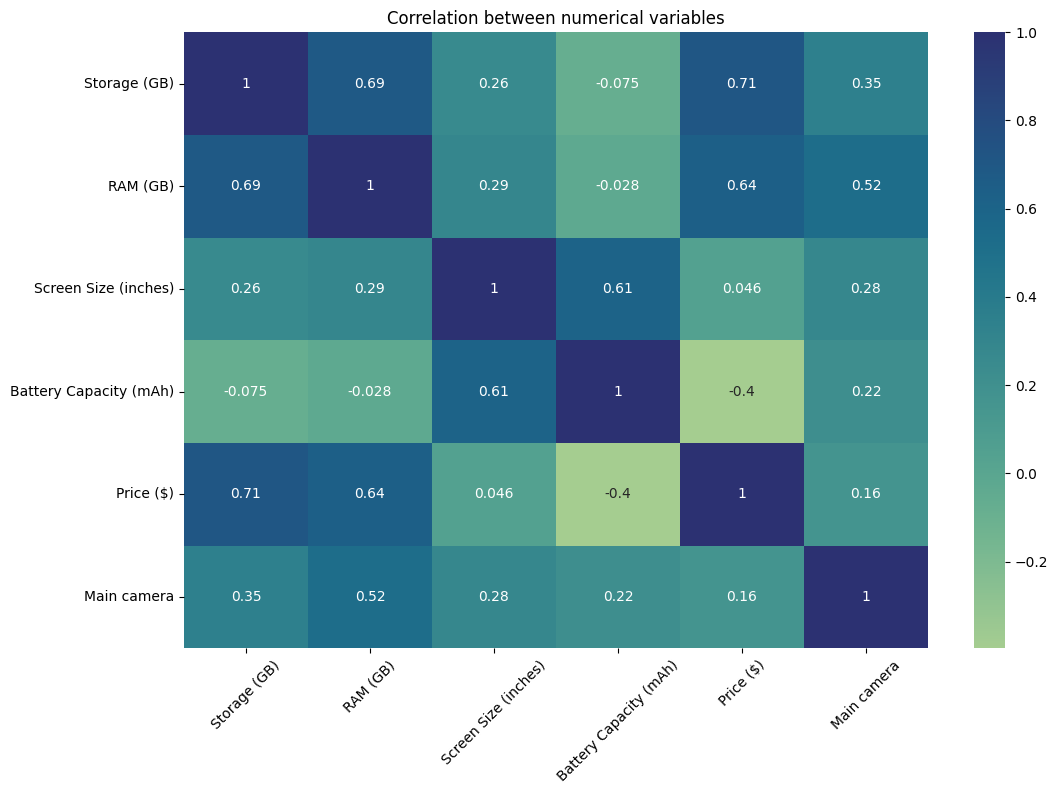

In [67]:
#creamos un heatmap con Seaborn para representar estas correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='crest')
#añadimos las etiquetas de los ejes. También centramos las etiquetas entre las celdas del heatmap, y especificamos los nombres de las columnas como etiquetas
plt.xticks(ticks=np.arange(len(df_corr.columns)) + 0.5, labels=df_corr.columns, rotation=45)
plt.yticks(ticks=np.arange(len(df_corr.columns)) + 0.5, labels=df_corr.columns, rotation=0)
plt.title('Correlation between numerical variables')
plt.show()

A continuación vamos a detallar las conclusiones más destacadas del mapa de calor:

-La variable que se relaciona más con el precio de los móviles es la capacidad de almacenamiento, alcanzando el 71%. Dicho de otra manera, la memoria sería la variable que explica más el incremento del coste de un móvil. Otra variable con una cierta correlación (más del 65%) con el precio es la memoria RAM.

-Otra correlación importante (de un 69%) sería la de la memoria RAM y la capacidad de almacenamiento. Nos parece intuitivo, ya que la mayoría de los móviles, cuando aumentan su RAM, también suelen aumentar su capacidad de almacenamiento.

-Otra correlación que debo mencionar es la correlación (de un 61%) entre la batería y el tamaño de pantalla. Nos parece que tiene sentido esta correlación, ya que una mayor pantalla demanda más energía, y por ende una mayor batería.

-En cambio hay algunas correlaciones que no terminamos de entender. Por ejemplo, la correlación negativa (de un -40%) entre el precio y la batería. No tiene mucho sentido que a mayor precio de los móviles, disminuya su batería. Esperábamos una correlación positiva, aunque fuera más bien discreta o casi neutral, cercana al 0.

##VARIABLES CATEGÓRICAS Y PRECIO

Pensamos que también sería interesante agrupar los datos según ciertos criterios categóricos.

Para empezar, vamos a agrupar los móviles según la marca y extraer el precio medio en cada una de estas.

In [68]:
df_brand_price = df.group_by('Brand').agg([
    pl.mean('Price ($)').round(1)
]).sort('Price ($)', descending=True)
df_brand_price

Brand,Price ($)
str,f64
"""Sony""",1299.0
"""Asus""",874.0
"""Huawei""",783.2
"""Apple""",745.7
"""Google""",699.0
"""OnePlus""",644.3
"""LG""",615.7
"""Blackberry""",499.0
"""Samsung""",480.4


In [69]:
#lo representamos mediante un gráfico de barras
fig_brand_price = px.bar(df_brand_price, x='Brand', y='Price ($)', title = 'Average price per brand', width=1000, color='Brand')
fig_brand_price.update_layout(title_x=0.5)
fig_brand_price.show()

Vamos a destacar del gráfico los siguientes puntos:

-En nuestros registros, Sony es la marca que produce los móviles más caros de media, pero este dato no es del todo fiable, dado que solo tenemos un móvil Sony en nuestro dataset, y resulta ser un dispositivo caro. Si tuviéramos un base de datos con una muestra más nutrida y representativa de móviles de Sony, seguramente esta marca no encabezaría el gráfico.

-Asus ocupa el segundo lugar en cuanto a precio. Esta marca no es fundamentalmente conocida por los teléfonos móviles, y también está representada en nuestro dataset escasamente, en concreto, solo con 4 dispositivos. Pensamos que sucede algo similar que con Sony, que contamos con una muestra poco representativa de los móviles de Asus.

-Apple ocupa el cuarto lugar en precios. De media sus móviles tienen un coste de unos 750 euros, lo cual sí me parece representativo del precio de los móviles de la manzana de hace aproximadamente un par de años, que sería cuando se hizo el dataset.

-Por la parte baja de la lista tenemos marcas como Realme, Nokia, Motorola y Xiaomi. Efectivamente la percepción que se tiene hoy en día de estas marcas es que fabrican móviles relativamente asequibles. Es cierto que Nokia y Motorola hace varios lustros no fabricaban móviles especialmente baratos (en relación a los precios del momento, me refiero), pero hoy en día su papel predominante en el mercado ha cambiado.   

Luego hacemos lo mismo pero con los sistemas operativos y el precio medio de cada uno de estos.

In [70]:
df_os_price = df.group_by('OS').agg([
    pl.mean('Price ($)').round(1)
]).sort('Price ($)', descending=True)
df_os_price

OS,Price ($)
str,f64
"""iOS""",745.7
"""HarmonyOS""",699.0
"""Android""",380.6


In [71]:
#lo representamos con un gráfico
fig_os_price = px.bar(df_os_price, x='OS', y='Price ($)', title = 'Average price per Operating System', width=800, color='OS')
fig_os_price.update_layout(title_x=0.5)
fig_os_price.show()

Destacamos los siguientes aspectos de los análisis:

-iOS lidera en términos de precio por sistema operativo, lo cual no es sorprendente, aunque en el gráfico de marcas y precios, Apple aparezca 'solo' en cuarto lugar. Puede haber marcas que fabriquen dispositivos Android más caros, pero en general, el precio de los iPhone es superior al de los dispositivos del ecosistema Android.

-HarmonyOS tiene una representación bien escasa en el dataset, de solo un dispositivo, así que no sabemos hasta qué punto es fiable lo que nos dice el gráfico de este sistema operativo, en cuanto a precios. Sería conveniente conseguir datos de más móviles con Harmony.

Para terminar este apartado, vamos a extraer el precio medio de los móviles por país fabricante.

In [72]:
df_country_price = df.group_by('Country').agg([
    pl.mean('Price ($)').round(1)
]).sort('Price ($)', descending=True)
df_country_price

Country,Price ($)
str,f64
"""Japan""",1299.0
"""Taiwan""",874.0
"""United States""",725.3
"""Canada""",499.0
"""South Korea""",485.4
"""China""",341.4
"""Finland""",244.7


In [73]:
#lo representamos con un gráfico
fig_country_price = px.bar(df_country_price, x='Country', y='Price ($)', title = 'Average price per country', width=1000, color='Country')
fig_country_price.update_layout(title_x=0.5)
fig_country_price.show()

Como siempre, vamos a comentar las principales conclusiones:

-Japón lidera el gráfico. Esto se debe a la circunstancia que hemos comentado antes: Sony, que es la única compañia japonesa de la base de datos, solo aporta un móvil en nuestro dataset, y se trata de un dispositivo bastante caro. Eso crea un sesgo que se traslada a nuestro gráfico, ya que no refleja el precio medio de los móviles de Sony.

-Por la parte baja del gráfico tenemos países como Finlandia, representada por Nokia que es una empresa a la baja (de hecho a día de hoy, julio 2024, creo que ya no fabrican móviles), y China, que es un país que tradicionalmente ha producido móviles relativamente baratos.